# Comparision of the co-expression of CD44-TRPA1 in mouse tissues and nervous system cell types with scRNA-based correlation coefficient analysis

## Abstract
Tissue-specific and cell-specific gene expression can result in the presence or absence of certain protein interactions and complexes, leading to profound tissue-specific and cell-specific functional interaction between these genes. To identify the co-expression patterns of CD44-TRPA1 in mouse tissues, we integrate mouse gene expression data based on scRNA-sequencing from neuronal and non-neuronal tissues to test the possibility of tissue and cell specificity of the CD44-TRPA1 interaction. The co-expression between two genes is often estimated by using the traditional Pearson correlation coefficients (PCCs). The Pearson correlation gives an absolute value ranging from 0 to 1. If the absolute value of the correlation is close to 1, then we say that the pair of genes are significantly co-expressed. We evaluate the correlation between the CD44-TRPA1 expression on mouse neuronal and non-neuronal tissues using two differently pre-processed scRNA-seq datasets. Our analysis showed that only DRG tissue had a tissue-specific co-expression correlation (threshold PCC = 0.6) between CD44-TRPA1 in these 20 tissues. Human DRG tissue had a similar co-expression correlation (PCC = 0.55) as mouse DRG. In the nervous system, cell-specific co-expression was present in sensory neurons from the peripheral nervous system. These results suggest a tissue- and cell-specific functional interaction may exist between CD44-TRPA1.

## Introduction
Within any particular cell type or tissue, only a subset of proteins is expressed and so only a subset of interactions can occur. Not all the physical associations described by protein interaction networks can occur between proteins within one specific cell type or tissue. This tissue-specific and cell-specific gene expression may lead to profound tissue-specific and cell-specific functional interaction between these genes. Thus accurate knowledge of tissue-specific gene and protein information is of great importance for understanding biological functions and determining biomarkers and drug targets. Here we examined the gene co-expression data generated by scRNA-sequencing for 20 mouse tissues and 10 neuronal cell types. We try to identify tissue-specific elements and biological functions based on these scRNA-sequencing data.


However, a vexing challenge in scRNA-sequencing is that the observed expression counts capture only a small random sample (typically 5%–15%) of the total transcriptome of each cell. In the case of lowly expressed genes, this can lead to a lack of detection of an expressed gene, a phenomenon called 'dropout'. This may lead to a loss of gene-gene relationships in the data, obscuring all but the strongest relationships. Here we use Markov Affinity-based Graph Imputation of Cells (MAGIC) algorithm for denoising high-dimensional data most commonly applied to single-cell RNA sequencing data. MAGIC can learn the manifold data, using the resultant graph to smooth the features and restore the structure of the data. We applied the MAGIC transformation of all the scRNA-sequencing data before we estimated the co-expression correlation between two genes using the traditional Pearson correlation coefficients (PCCs).

## Set-up

In [1]:
library(ggplot2)
library(ggprism)
library(gplots)
library(here)
library(loomR)
library(Rmagic)
library(Seurat)
library(SeuratDisk)
library(tidyverse)
library(viridis)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


here() starts at /Users/shao/Library/CloudStorage/OneDrive-Personal/PythonScripts/Experiment Project/GitHub/scRNA co-expression correlation

Loading required package: R6

Loading required package: hdf5r



ERROR: Error in library(Rmagic): there is no package called ‘Rmagic’


## Data packaging
First, we prepared the data from different data sources. We will load data from loom, raw counts, and Robj objects.

### Setup the Seurat object from loom
Unlike standard R objects that load all data contained within them into memory, loom objects are merely connections to a file on disk, which enables scaling to massive datasets with low memory consumption. You can connect to an existing loom file (example here), create your own from an expression matrix using loomR::create, or create a loom file from an existing Seurat object using Convert.

In [ ]:
filename = "C:/Users/shaoq/Documents/RNA-seq Data/Mouse nervous system loom/L6_Astroependymal_cells.loom"

In [2]:
# Load the seu dataset
seu.loom <- Connect(filname, mode = "r")
seu.loom

Class: loom
Filename: C:\Users\shaoq\Documents\RNA-seq Data\Mouse nervous system loom\L6_Astroependymal_cells.loom
Access type: H5F_ACC_RDONLY
Attributes: CreationDate, last_modified
Listing:
       name    obj_type  dataset.dims dataset.type_class
  col_attrs   H5I_GROUP          <NA>               <NA>
 col_graphs   H5I_GROUP          <NA>               <NA>
     layers   H5I_GROUP          <NA>               <NA>
     matrix H5I_DATASET 22286 x 27998          H5T_FLOAT
  row_attrs   H5I_GROUP          <NA>               <NA>
 row_graphs   H5I_GROUP          <NA>               <NA>

In [3]:
seu <- as.Seurat(seu.loom)
seu

Warning message:
"Cannot find version information in this loom file, assuming to be 0.1.0"
Reading in /matrix

Warning message:
"Duplicate feature names found, making unique"
Warning message:
"Duplicate feature names found, making unique"
Storing /matrix as counts

Saving /matrix to assay 'RNA'

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is AgeAnalysisPoolAnalysisProjectBucketCellConcCell_ConcChipIDClassClassProbability_AstrocyteClassProbability_Astrocyte.ImmuneClassProbability_Astrocyte.NeuronsClassProbability_Astrocyte.OligosClassProbability_Astrocyte.VascularClassProbability_Bergmann.gliaClassProbability_BloodClassProbability_Blood.VascularClassProbability_Enteric.gliaClassProbability_Enteric.glia.CyclingClassProbability_EpendymalClassProbability_Ex.NeuronsClassProbability_Ex.VascularClassProbability_ImmuneClassProbability_Immune.NeuronsClassProbability_Immune.OligosClassProbability_NeuronsClassProbability_Neurons.CyclingClassPro

An object of class Seurat 
27998 features across 22286 samples within 1 assay 
Active assay: RNA (27998 features, 0 variable features)

In [4]:
colnames(seu@meta.data)

[1] "orig.ident"                                    
  [2] "nCount_RNA"                                    
  [3] "nFeature_RNA"                                  
  [4] "Age"                                           
  [5] "AnalysisPool"                                  
  [6] "AnalysisProject"                               
  [7] "Bucket"                                        
  [8] "CellConc"                                      
  [9] "Cell_Conc"                                     
 [10] "ChipID"                                        
 [11] "Class"                                         
 [12] "ClassProbability_Astrocyte"                    
 [13] "ClassProbability_Astrocyte.Immune"             
 [14] "ClassProbability_Astrocyte.Neurons"            
 [15] "ClassProbability_Astrocyte.Oligos"             
 [16] "ClassProbability_Astrocyte.Vascular"           
 [17] "ClassProbability_Bergmann.glia"                
 [18] "ClassProbability_Blood"                        
 [19] "ClassProbability_Blood.Vascular"               
 [20] "ClassProbability_Enteric.glia"                 
 [21] "ClassProbability_Enteric.glia.Cycling"         
 [22] "ClassProbability_Ependymal"                    
 [23] "ClassProbability_Ex.Neurons"                   
 [24] "ClassProbability_Ex.Vascular"                  
 [25] "ClassProbability_Immune"                       
 [26] "ClassProbability_Immune.Neurons"               
 [27] "ClassProbability_Immune.Oligos"                
 [28] "ClassProbability_Neurons"                      
 [29] "ClassProbability_Neurons.Cycling"              
 [30] "ClassProbability_Neurons.Oligos"               
 [31] "ClassProbability_Neurons.Satellite.glia"       
 [32] "ClassProbability_Neurons.Vascular"             
 [33] "ClassProbability_OEC"                          
 [34] "ClassProbability_Oligos"                       
 [35] "ClassProbability_Oligos.Cycling"               
 [36] "ClassProbability_Oligos.Vascular"              
 [37] "ClassProbability_Satellite.glia"               
 [38] "ClassProbability_Satellite.glia.Cycling"       
 [39] "ClassProbability_Satellite.glia.Schwann"       
 [40] "ClassProbability_Schwann"                      
 [41] "ClassProbability_Ttr"                          
 [42] "ClassProbability_Vascular"                     
 [43] "ClusterName"                                   
 [44] "Clusters"                                      
 [45] "Comment"                                       
 [46] "Comments"                                      
 [47] "DateCaptured"                                  
 [48] "Date_Captured"                                 
 [49] "Description"                                   
 [50] "Developmental_compartment"                     
 [51] "DonorID"                                       
 [52] "Estimated.Number.of.Cells"                     
 [53] "Flowcell"                                      
 [54] "Fraction.Reads.in.Cells"                       
 [55] "Label"                                         
 [56] "LeafOrder"                                     
 [57] "Location_based_on"                             
 [58] "Mean.Reads.per.Cell"                           
 [59] "Median.Genes.per.Cell"                         
 [60] "Median.UMI.Counts.per.Cell"                    
 [61] "MitoRiboRatio"                                 
 [62] "NGI_PlateWell"                                 
 [63] "Neurotransmitter"                              
 [64] "NumPooledAnimals"                              
 [65] "Num_Pooled_Animals"                            
 [66] "Number.of.Reads"                               
 [67] "OriginalClusters"                              
 [68] "Outliers"                                      
 [69] "PCRCycles"                                     
 [70] "PCR_Cycles"                                    
 [71] "PassedQC"                                      
 [72] "PlugDate"                                      
 [73] "Plug_Date"                         

In [7]:
unique(seu@meta.data$ClusterName)

[1] "ACMB"  "ACBG"  "ACNT1" "ACNT2" "EPMB"  "RGDG"  "RGSZ"  "ACTE1" "ACTE2"
[10] "ACOB"  "EPEN"  "EPSC"  "HYPEN" "CHOR"

In [8]:
head(seu$ClusterName)
Idents(seu) <- seu$ClusterName

10X57_3_TCACCTGTGTTG-    10X57_3_TAGGGACCCACT-    10X57_3_TAAGCTGGAGTG- 
                  "ACMB"                   "ACMB"                   "ACMB" 
   10X57_3_ACCTACACGACT-    10X51_4_AAGATGGGTAAA- 10X33_2_TAAGAGGAAGGGTG-1 
                  "ACMB"                   "ACMB"                   "ACMB"

In [9]:
seu@assays$RNA@data

   [[ suppressing 32 column names '10X57_3_TCACCTGTGTTG-', '10X57_3_TAGGGACCCACT-', '10X57_3_TAAGCTGGAGTG-' ... ]]

   [[ suppressing 32 column names '10X57_3_TCACCTGTGTTG-', '10X57_3_TAGGGACCCACT-', '10X57_3_TAAGCTGGAGTG-' ... ]]

   [[ suppressing 32 column names '10X57_3_TCACCTGTGTTG-', '10X57_3_TAGGGACCCACT-', '10X57_3_TAAGCTGGAGTG-' ... ]]



27998 x 22286 sparse Matrix of class "dgCMatrix"
                                                                                              
Cidea          1  .  1  1  .  2  .  .  3  1  3  .  6  2  2  1  1  .  .  .  2  1  1 .   2  2  .
Hspb8          1  .  1  2  .  2  .  .  .  2  .  1  2  2  .  4  .  2  1  2  1  2  1 1   3  1  2
Fbxo2          4  2  8  7  6  3  3  3  4  5  1  3  3  4  5  6  2  9  1  9  6  1  5 3   . 13  7
Myoc           .  .  .  3  .  .  3  .  9  7  .  . 21  2  6  7  .  .  .  .  .  .  2 1   2 22 10
Gfap          35 17 32 30 23 29 15 37 16 67 24 16 42 23 22 78 48 38 20 35 12 16 33 9 118 33 37
Sulf2          1  2  2  .  2  4  .  .  .  1  1  .  1  1  2  1  .  3  1  .  .  .  1 .   7  4  2
Aplnr          1  1  .  .  .  .  1  .  1  1  .  1  6  .  3  6  .  .  .  7  .  .  . .   2  3  5
1500009L16Rik  .  1  .  .  .  .  .  .  4  1  .  .  .  .  .  .  .  .  .  .  .  .  . .   .  .  1
Lrrc55         1  .  1  .  .  .  .  2  .  1  .  .  .  1  .  .  .  .  .  .  .  .  1 .   2  3  1
S

### Setup the Seurat object from counts
We can use the count matrix to create a Seurat object with the CreateSeuratObject(). The object serves as a container that contains both data (like the count matrix) and analysis (like PCA, or clustering results) for a single-cell dataset. We need to clean and make count matrix with the raw counts.

In [ ]:
# raw counts
filename <- "./GSM4130750_WT_1.csv.gz"
countsData <- read_csv(filename, col_names = FALSE, skip_empty_rows = TRUE)

In [ ]:
countsData <- countsData %>% drop_na()

In [ ]:
head(countsData)

In [ ]:
cell_identity <- countsData[1, ]
head(cell_identity)

In [ ]:
countsData <- countsData[-c(1), ]
head(countsData)

In [ ]:
countsData[c(12087:12099), ]

In [ ]:
countsData <- countsData[-c(12087:12099), ]

In [ ]:
countsData <- column_to_rownames(countsData, var = "X1")

In [ ]:
colnames(countsData) <- as.character(countsData[1, ])
countsData <- countsData[-1, ]

In [ ]:
head(countsData)

In [ ]:
tail(countsData)

In [ ]:
seu <- CreateSeuratObject(counts = countsData, project = "drg_new", min.cells = 3,
    min.features = 200)

In [ ]:
head(seu@meta.data)

### Setup the Seurat object from Robj
We can use the load() function in R to load objects that were saved using the save() function.

In [10]:
load("C:/Users/shaoq/Documents/RNA-seq Data/Tabula Muris/facs_Kidney_seurat_tiss.Robj", verbose = TRUE)

Loading objects:
  tiss


In [11]:
tiss

An old seurat object
 23341 genes across 519 samples

In [12]:
colnames(tiss@meta.data)

[1] "nGene"                        "nReads"                      
 [3] "orig.ident"                   "plate.barcode"               
 [5] "mouse.id"                     "tissue"                      
 [7] "subtissue"                    "FACS.selection"              
 [9] "mouse.sex"                    "percent.ercc"                
[11] "free_annotation"              "cell_ontology_class"         
[13] "percent.ribo"                 "res.2.5"                     
[15] "previous_cell_ontology_class" "cluster.ids"                 
[17] "cell_ontology_id"

In [13]:
head(tiss@meta.data)
head(tiss@raw.data)

,nGene,nReads,orig.ident,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,percent.ercc,free_annotation,cell_ontology_class,percent.ribo,res.2.5,previous_cell_ontology_class,cluster.ids,cell_ontology_id
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
A1.B001717.3_38_F.1.1,2330,951011,Kidney,B001717,3_38_F,Kidney,,Viable,F,0.01592914,NA,macrophage,0.030806163,8,NA,8,CL:0000235
A10.B002775.3_39_F.1.1,2032,1059637,Kidney,B002775,3_39_F,Kidney,,Viable,F,0.03694141,NA,endothelial cell,0.014155791,0,NA,0,CL:0000115
A10.MAA000752.3_10_M.1.1,1789,409127,Kidney,MAA000752,3_10_M,Kidney,,Viable,M,0.03798882,NA,endothelial cell,0.015506188,5,NA,5,CL:0000115
A11.MAA000801.3_11_M.1.1,887,340318,Kidney,MAA000801,3_11_M,Kidney,,Viable,M,0.08660551,NA,kidney collecting duct epithelial cell,0.006605587,1,NA,1,CL:1000454
A12.B001717.3_38_F.1.1,2130,1076045,Kidney,B001717,3_38_F,Kidney,,Viable,F,0.01704210,NA,macrophage,0.039532733,8,NA,8,CL:0000235
A12.MAA000801.3_11_M.1.1,1015,495057,Kidney,MAA000801,3_11_M,Kidney,,Viable,M,0.06915303,NA,kidney collecting duct epithelial cell,0.009615054,4,NA,4,CL:1000454


,A1.B001717.3_38_F.1.1,A1.B002775.3_39_F.1.1,A1.MAA000801.3_11_M.1.1,A10.B001717.3_38_F.1.1,A10.B002775.3_39_F.1.1,A10.MAA000752.3_10_M.1.1,A10.MAA000801.3_11_M.1.1,A11.B001717.3_38_F.1.1,A11.MAA000801.3_11_M.1.1,A12.B001717.3_38_F.1.1,⋯,P7.MAA000752.3_10_M.1.1,P7.MAA000801.3_11_M.1.1,P7.MAA000922.3_9_M.1.1,P8.B001717.3_38_F.1.1,P8.B002775.3_39_F.1.1,P8.MAA000752.3_10_M.1.1,P8.MAA000922.3_9_M.1.1,P9.B001717.3_38_F.1.1,P9.B002775.3_39_F.1.1,P9.MAA000752.3_10_M.1.1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0610005C13Rik,2,0,0,7,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,0,0,0,268,43,0,0,0,0,⋯,0,0,0,51,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,50,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [14]:
seu <- UpdateSeuratObject(tiss)

Updating from v2.X to v3.X

Validating object structure

Updating object slots

Ensuring keys are in the proper strucutre

Ensuring feature names don't have underscores or pipes

Object representation is consistent with the most current Seurat version



In [15]:
seu

An object of class Seurat 
23341 features across 519 samples within 1 assay 
Active assay: RNA (23341 features, 5122 variable features)
 2 dimensional reductions calculated: pca, tsne

In [16]:
head(seu@assays$RNA@data)

   [[ suppressing 519 column names 'A1.B001717.3_38_F.1.1', 'A10.B002775.3_39_F.1.1', 'A10.MAA000752.3_10_M.1.1' ... ]]



6 x 519 sparse Matrix of class "dgCMatrix"
                                                                               
0610005C13Rik 1.132377 .        .        . . . . .        6.085003 . . .       
0610007C21Rik .        5.537007 4.664399 . . . . .        6.846731 . . 2.237605
0610007L01Rik .        .        .        . . . . 5.612241 .        . . .       
0610007N19Rik .        .        .        . . . . 4.164613 2.447512 . . .       
0610007P08Rik .        .        .        . . . . .        .        . . .       
0610007P14Rik .        .        .        . . . . .        .        . . .       
                                                                       
0610005C13Rik 3.034792 . 6.976288 .        .        . .        .       
0610007C21Rik 4.033012 . 6.874778 .        2.278326 . 1.634209 4.346568
0610007L01Rik .        . .        .        .        . .        .       
0610007N19Rik 3.881810 . 2.428120 4.584638 2.278326 . 4.107891 3.536403
0610007P08Rik .        . .        .  

In [17]:
colnames(seu@meta.data)

[1] "nReads"                       "orig.ident"                  
 [3] "plate.barcode"                "mouse.id"                    
 [5] "tissue"                       "subtissue"                   
 [7] "FACS.selection"               "mouse.sex"                   
 [9] "percent.ercc"                 "free_annotation"             
[11] "cell_ontology_class"          "percent.ribo"                
[13] "res.2.5"                      "previous_cell_ontology_class"
[15] "cluster.ids"                  "cell_ontology_id"            
[17] "nCount_RNA"                   "nFeature_RNA"

In [18]:
unique(seu@meta.data$orig.ident)

[1] Kidney
Levels: Kidney

## Normalizing and scaling the data

In [11]:
head(seu@assays$RNA@data)

   [[ suppressing 34 column names '10X53_4_AATCGAACAGCT-', '10X53_6_TTCGGACTGTTT-', '10X53_3_TGCAACTTCGCC-' ... ]]



6 x 37227 sparse Matrix of class "dgCMatrix"
                                                                               
Pcdh18   .        .         0.5695766 .        .        .         . . .        
BC030336 .        .         .         .        .        .         . . .        
Plxnd1   0.674248 0.7332808 .         .        .        .         . . 0.7222679
Atp2a3   .        .         0.9302083 .        .        .         . . .        
Rbp1     .        1.8577811 0.9302083 2.082247 1.527122 0.7237965 . . 1.4296634
Higd1b   .        2.7817093 1.7236790 .        2.105329 1.4319231 . . 1.1372544
                                                                              
Pcdh18   .        .         .        . .         . .        .         .       
BC030336 .        .         .        . .         . .        0.9306268 .       
Plxnd1   1.453144 .         1.009632 . 0.6511181 . 0.631669 1.4041826 1.077596
Atp2a3   .        .         1.009632 . .         . .        .         .       


In [9]:
seu <- NormalizeData(seu, normalization.method = "LogNormalize", scale.factor = 10000)

## Rmagic: MAGIC - Markov Affinity-Based Graph Imputation of Cells

In [39]:
seu

An object of class Seurat 
23341 features across 519 samples within 1 assay 
Active assay: RNA (23341 features, 5122 variable features)
 2 dimensional reductions calculated: pca, tsne

In [40]:
ex_matrix <- seu@assays$RNA@data

In [41]:
ex_matrix_t <- t(ex_matrix)
head(ex_matrix_t)

   [[ suppressing 34 column names '0610005C13Rik', '0610007C21Rik', '0610007L01Rik' ... ]]



6 x 23341 sparse Matrix of class "dgCMatrix"
                                                                              
A1.B001717.3_38_F.1.1    1.132377 .        . . . . . . . . 0.7185773 .        
A10.B002775.3_39_F.1.1   .        5.537007 . . . . . . . . .         0.6646034
A10.MAA000752.3_10_M.1.1 .        4.664399 . . . . . . . . 5.6247315 .        
A11.MAA000801.3_11_M.1.1 .        .        . . . . . . . . .         .        
A12.B001717.3_38_F.1.1   .        .        . . . . . . . . .         .        
A12.MAA000801.3_11_M.1.1 .        .        . . . . . . . . .         .        
                                                                             
A1.B001717.3_38_F.1.1    .        . . .        .        .        . .        .
A10.B002775.3_39_F.1.1   1.343167 . . .        .        .        . 6.196017 .
A10.MAA000752.3_10_M.1.1 .        . . 5.341183 .        .        . .        .
A11.MAA000801.3_11_M.1.1 .        . . .        2.283941 .        . .        .
A12.B001717.

### Normalizing your data
After filtering, the next steps are to perform library size normalization and transformation. Log transformation is frequently used for single-cell RNA-seq, however, this requires the addition of a pseudocount to avoid infinite values at zero. We instead use a square root transform, which has similar properties to the log transform but has no problem with zeros.

In [42]:
ex_matrix_t <- library.size.normalize(ex_matrix_t)  # Normalizing data
ex_matrix_t <- sqrt(ex_matrix_t)
head(ex_matrix_t)

   [[ suppressing 34 column names '0610005C13Rik', '0610007C21Rik', '0610007L01Rik' ... ]]



6 x 23341 sparse Matrix of class "dgCMatrix"
                                                                               
A1.B001717.3_38_F.1.1    0.9058684 .        . . . . . . . . 0.7216162 .        
A10.B002775.3_39_F.1.1   .         1.958327 . . . . . . . . .         0.6784673
A10.MAA000752.3_10_M.1.1 .         1.952393 . . . . . . . . 2.1439783 .        
A11.MAA000801.3_11_M.1.1 .         .        . . . . . . . . .         .        
A12.B001717.3_38_F.1.1   .         .        . . . . . . . . .         .        
A12.MAA000801.3_11_M.1.1 .         .        . . . . . . . . .         .        
                                                                              
A1.B001717.3_38_F.1.1    .         . . .        .        .        . .        .
A10.B002775.3_39_F.1.1   0.9645233 . . .        .        .        . 2.071591 .
A10.MAA000752.3_10_M.1.1 .         . . 2.089239 .        .        . .        .
A11.MAA000801.3_11_M.1.1 .         . . .        1.810841 .        . .        .


In [43]:
ex_matrix_t <- as.matrix(ex_matrix_t)

In [44]:
head(ex_matrix_t[, "Trpa1"])

A1.B001717.3_38_F.1.1   A10.B002775.3_39_F.1.1 A10.MAA000752.3_10_M.1.1 
                       0                        0                        0 
A11.MAA000801.3_11_M.1.1   A12.B001717.3_38_F.1.1 A12.MAA000801.3_11_M.1.1 
                       0                        0                        0

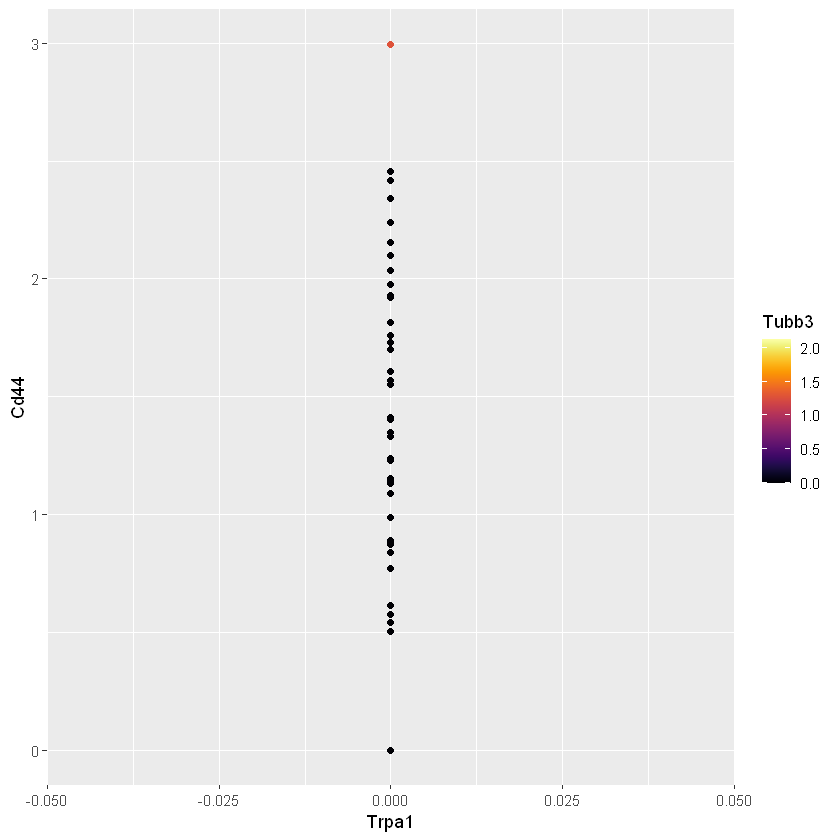

In [25]:
ggplot(as.data.frame(ex_matrix_t)) + geom_point(aes(Trpa1, Cd44, color = Tubb3)) +
    scale_colour_viridis(option = "B")

Running MAGIC is as simple as running the magic function.

In [45]:
MAGIC_data <- magic(ex_matrix_t, genes=c("Trpa1", "Cd44"))  # Running MAGIC

Error in py_module_import(module, convert = convert) : 
  ModuleNotFoundError: No module named 'magic'



Warning message in is.null(x = genes) || is.na(x = genes):
"'length(x) = 2 > 1' in coercion to 'logical(1)'"


List of 20
 $ python              : chr "C:/Users/shaoq/miniconda3/python.exe"
 $ libpython           : chr "C:/Users/shaoq/miniconda3/python310.dll"
 $ pythonhome          : chr "C:/Users/shaoq/miniconda3"
 $ pythonpath          : chr "C:\\Users\\shaoq\\MINICO~1\\python310.zip;C:\\Users\\shaoq\\MINICO~1\\DLLs;C:\\Users\\shaoq\\MINICO~1\\lib;C:\\"| __truncated__
 $ prefix              : chr "C:\\Users\\shaoq\\MINICO~1"
 $ exec_prefix         : chr "C:\\Users\\shaoq\\MINICO~1"
 $ base_exec_prefix    : chr "C:\\Users\\shaoq\\MINICO~1"
 $ virtualenv          : chr ""
 $ virtualenv_activate : chr ""
 $ version_string      : chr "3.10.6 | packaged by conda-forge | (main, Oct  7 2022, 20:14:50) [MSC v.1916 64 bit (AMD64)]"
 $ version             : chr "3.10"
 $ architecture        : chr "64bit"
 $ anaconda            : logi FALSE
 $ conda               : logi TRUE
 $ numpy               :List of 2
  ..$ path   : chr "C:/Users/shaoq/miniconda3/Lib/site-packages/numpy"
  ..$ version:Class 'num

ERROR: Error: Python module magic was not found.

Detected Python configuration:





In [28]:
as.data.frame(MAGIC_data)[1:5, 1:4]

ERROR: Error in as.data.frame(MAGIC_data): object 'MAGIC_data' not found


In [29]:
MAGIC_data

ERROR: Error in eval(expr, envir, enclos): object 'MAGIC_data' not found


In [ ]:
ggplot(MAGIC_data) + geom_point(aes(x = Trpa1, y = Cd44, color = Tubb3)) + scale_colour_viridis(option = "B")

In [ ]:
data <- ex_matrix_t[, c("Cd44", "Trpa1")]

In [ ]:
data <- as.data.frame(data)

In [ ]:
lin.mod = lm(formula = Cd44 ~ Trpa1, data = MAGIC_data$result)
# Check R^2 in the model summary. It is labeled as Multiple R-squared.
summary(lin.mod)

In [ ]:
head(MAGIC_data$result)

In [ ]:
z <- cor(MAGIC_data$result)
z

In [ ]:
heatmap.2(z, scale = "none", col = bluered, trace = "none", density.info = "none")

In [11]:
df <- read_csv("./pcc_cell_types_1.csv")
df$cell_type <- factor(df$cell_type, levels = df$cell_type)
head(df)

Rows: 10 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): cell_type, correlation
dbl (1): r

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cell_type,correlation,r
<fct>,<chr>,<dbl>
Glia,pcc,0.04265442
Astrocytes,pcc,0.00000000
Microglia,pcc,0.00000000
Oligodendrocytes,pcc,0.00000000
Satellite_glia,pcc,0.05108274
Neurons,pcc,0.76463110


## Heatmap, line plot 

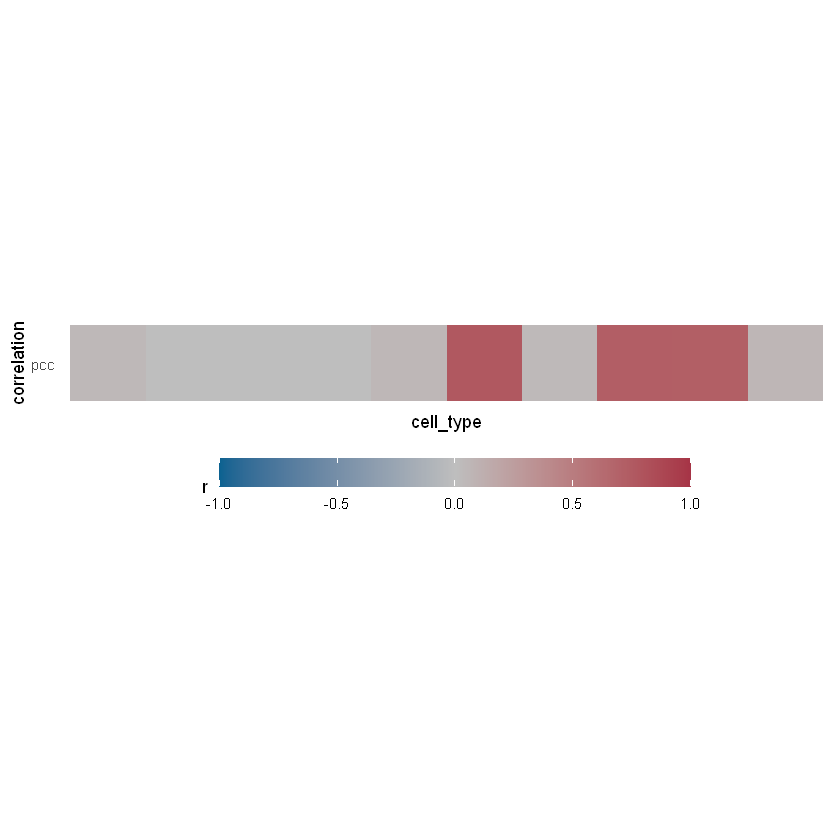

In [12]:
p <- ggplot(df, aes(cell_type, correlation, fill = r)) + geom_tile() + scale_fill_gradient2(mid = "grey",
    low = "#0C6291", high = "#A63446", limits = c(-1, 1)) + scale_x_discrete(breaks = 0:23,
    labels = 0:23) + theme_minimal() + theme(legend.position = "bottom", legend.key.width = unit(2,
    "cm"), panel.grid = element_blank()) + coord_equal()
p

In [34]:
head(MAGIC_data$result)

,Trpv1,Tubb3,Cd44,Trpa1
,<dbl>,<dbl>,<dbl>,<dbl>
10X43_2_ACTCGAGTTCAG-,0.024365482,5.451377,1.596169,0.1621004
10X43_2_ACGATGGGGACA-,0.030426930,5.495064,1.539669,0.1604914
10X43_2_CTCTTGTCCAGA-,0.027847448,5.500664,1.567098,0.1658816
10X43_2_TAGATGGATGAA-,0.085017091,5.334153,1.263484,0.1516746
10X43_2_TGCGGACTTCGC-,0.027973733,5.489187,1.554472,0.1634768
10X43_2_CATTGAGCTGTA-,0.009821304,5.224637,1.680804,0.1240586


`geom_smooth()` using formula 'y ~ x'



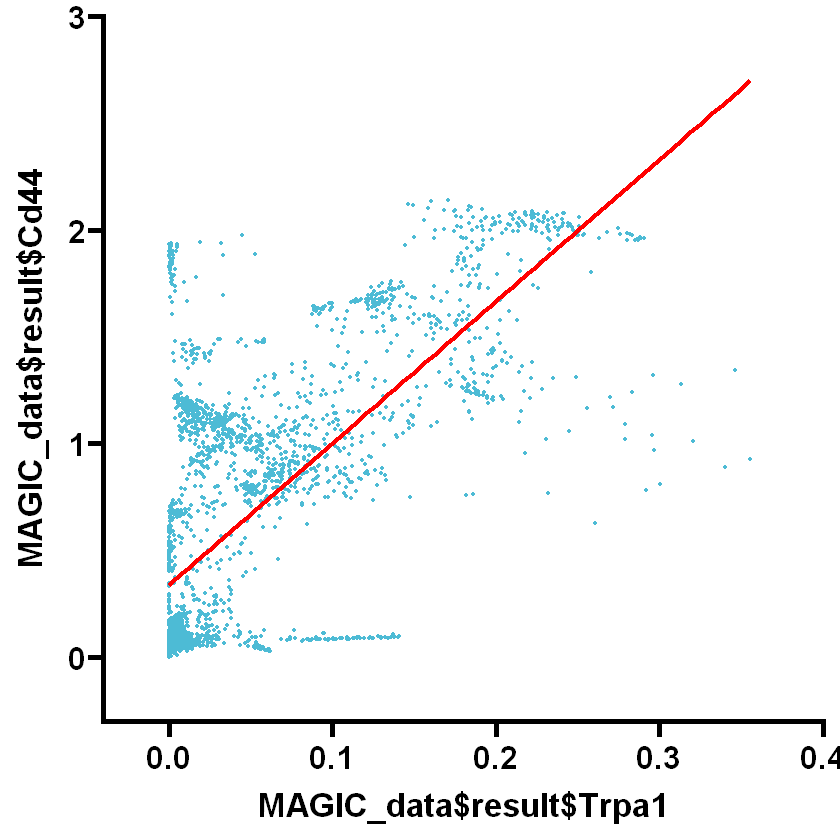

In [65]:
p <- ggplot(data, aes(x = MAGIC_data$result$Trpa1, y = MAGIC_data$result$Cd44)) +
    geom_point(size = 0.8, color = "#4DBBD5FF") + geom_smooth(color = "red", method = "lm",
    , size = 1.2, se = FALSE) + theme_prism(base_size = 20) + NoLegend() + scale_x_continuous(limits = c(-0.04,
    0.4001), expand = c(0, 0)) + scale_y_continuous(limits = c(-0.3, 3), expand = c(0,
    0))
p

## Save figures 

In [190]:
ggsave(filename = "1.png", width = 3, height = 6, units = "in", dpi = 600)